# Trend Changes

In [2]:
import pandas as pd
from fbprophet import Prophet
%matplotlib inline

In [3]:
df = pd.read_csv('../Data/HospitalityEmployees.csv')

In [5]:
df.columns = ['ds','y']
df['ds'] = pd.to_datetime(df['ds'])

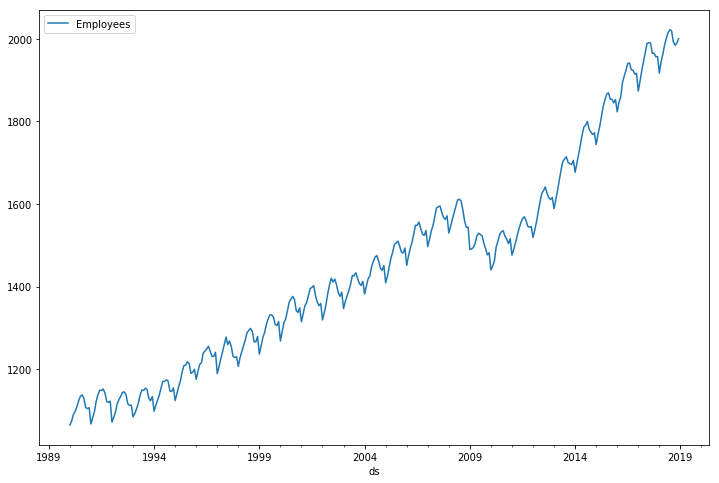

In [8]:
df.plot(x='ds',y='y',figsize=(12,8),label='Employees')

In [9]:
len(df)

348

In [10]:
len(df) - 12

336

In [12]:
train = df.iloc[:336]
test = df.iloc[336:]

In [13]:
m = Prophet()
m.fit(train)
future = m.make_future_dataframe(periods=12,freq='MS')
forecast = m.predict(future)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/anaconda3/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


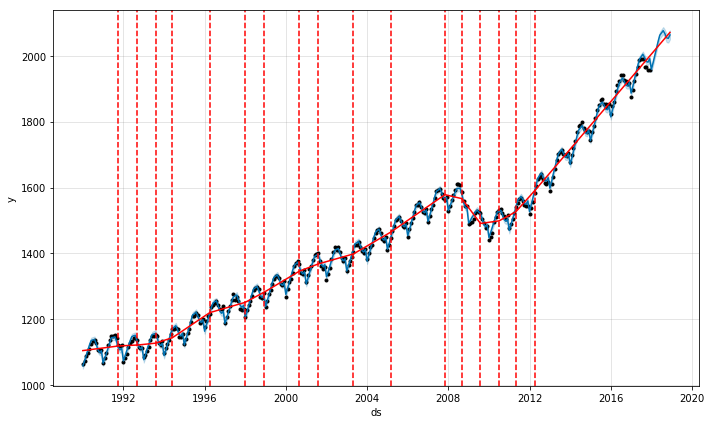

In [14]:
from fbprophet.plot import add_changepoints_to_plot
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)